In [1]:
#Import library
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



import warnings
warnings.filterwarnings('ignore')
import os;
os.listdir('/kaggle/input/')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['advertising-dataset']

In [2]:
#download dataset

sp = '/kaggle/input/advertising-dataset/advertising.csv'
sp

'/kaggle/input/advertising-dataset/advertising.csv'

In [3]:
sp = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
sp

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
sp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sp.shape

(200, 4)

In [8]:
#check for Null values
sp.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#Since there are no null values hence data is clean.

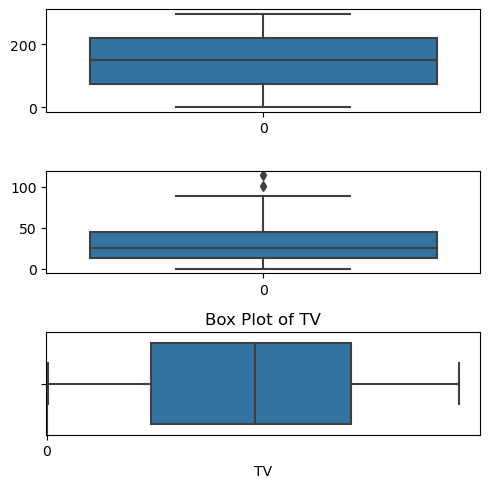

In [10]:
# Create a box plot to findout the outliers

#Method 1

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sp['TV'], ax = axs[0])
plt2 = sns.boxplot(sp['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sp['Radio'], ax = axs[2])
plt.tight_layout()
plt1 = sns.boxplot(data = sp, x='TV')
plt.title('Box Plot of TV')


plt.tight_layout()
plt.show()

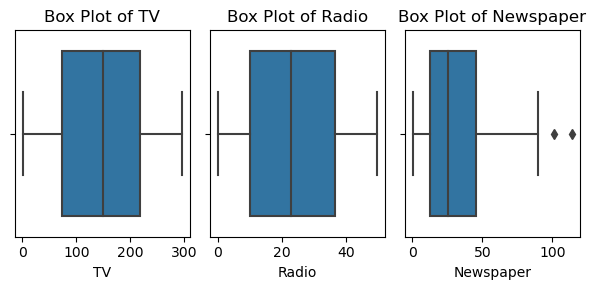

In [11]:
#Method 2
plt.figure(figsize=(6, 3))

plt.subplot(1, 3, 1)
sns.boxplot(x='TV', data=sp)
plt.title("Box Plot of TV")

plt.subplot(1, 3, 2)
sns.boxplot(x='Radio', data=sp)
plt.title("Box Plot of Radio")

plt.subplot(1, 3, 3)
sns.boxplot(x='Newspaper', data=sp)
plt.title("Box Plot of Newspaper")

plt.tight_layout()
plt.show()

**There are almost no outliers**

# Exploratory Data Analysis (EDA)

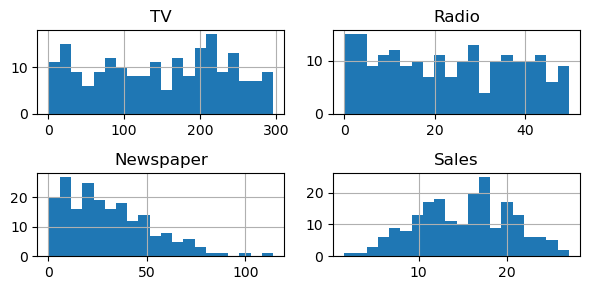

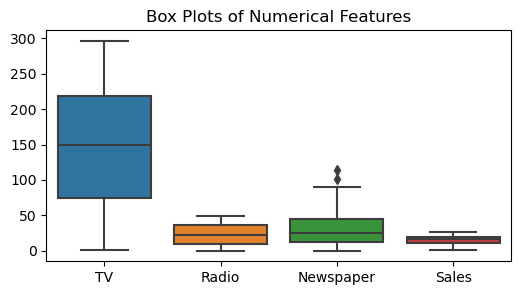

In [12]:
# Create histograms for numerical features
num_features = ['TV', 'Radio', 'Newspaper', 'Sales']
sp[num_features].hist(bins=20, figsize=(6, 3))
plt.tight_layout()
plt.show()

# Create box plots for numerical features
plt.figure(figsize=(6, 3))
sns.boxplot(data=sp[num_features])
plt.title('Box Plots of Numerical Features')
plt.show()

In [13]:
# Display the column names of the dataset
print(sp.columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


#  A heatmap can help in visualize the correlation between numerical features (TV, Radio, Newspaper & sales) in  dataset

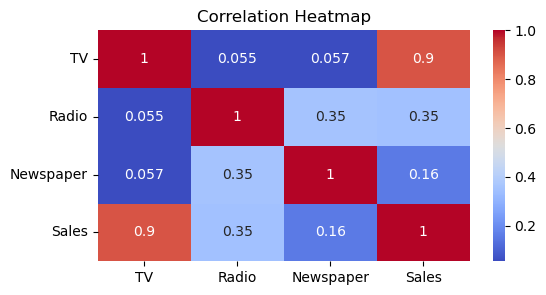

In [14]:
# Calculate the correlation matrix
correlation_matrix = sp.corr()

# Create a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Model Building
    

In [15]:
# Check column names
print(sp.columns)

# Extract features and target variable
selected_features = ['TV', 'Radio', 'Newspaper']
X = sp[selected_features]
y = sp['Sales']

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Create a linear regression model
model = LinearRegression()

In [18]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.2748262109549338


# Visualize Predictions vs. Actual Values

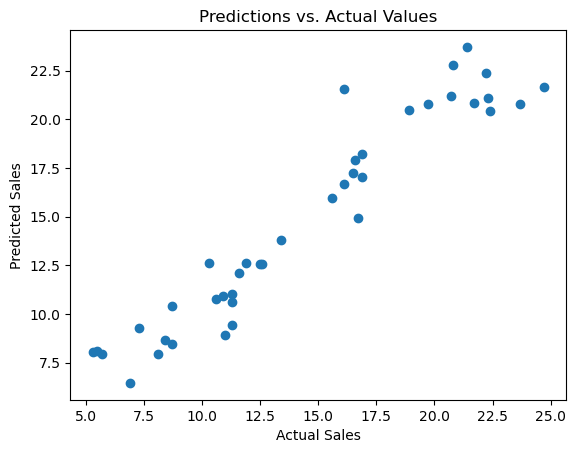

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predictions vs. Actual Values")
plt.show()


# Model Interpretation

In [22]:
coefficients = model.coef_
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


TV: 0.05450927083721978
Radio: 0.10094536239295579
Newspaper: 0.0043366468220340446


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load and preprocess your data (assuming 'X' is your feature matrix and 'y' is the target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to compare
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

# Loop through each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the results
    print(f"{model_name}: Mean Absolute Error = {mae}")


Linear Regression: Mean Absolute Error = 1.2748262109549338
Decision Tree: Mean Absolute Error = 1.1725000000000003
Random Forest: Mean Absolute Error = 0.8987500000000012


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Load and preprocess your data (assuming 'X' is your feature matrix and 'y' is the target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         160 non-null    float64
 1   Radio      160 non-null    float64
 2   Newspaper  160 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         40 non-null     float64
 1   Radio      40 non-null     float64
 2   Newspaper  40 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [28]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 160 entries, 79 to 102
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [29]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 40 entries, 95 to 76
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [30]:
# Create a list of models to compare
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

In [31]:

# Loop through each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    


In [32]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [33]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [34]:
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

In [35]:
    # Print the results
    print(f"{model_name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-------------------------")

Gradient Boosting:
Mean Absolute Error: 0.8307562530732664
Mean Squared Error: 1.2675303912818172
R-squared: 0.9589810592088367
-------------------------


In [36]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    # Add more hyperparameters to tune
}

In [37]:
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [38]:
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)

In [39]:
# Evaluate the best model's performance
best_mae = mean_absolute_error(y_test, best_pred)
best_mse = mean_squared_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

In [40]:
print("Best Model (Random Forest) with Hyperparameter Tuning:")
print(f"Mean Absolute Error: {best_mae}")
print(f"Mean Squared Error: {best_mse}")
print(f"R-squared: {best_r2}")


Best Model (Random Forest) with Hyperparameter Tuning:
Mean Absolute Error: 0.9229510123087687
Mean Squared Error: 1.460817735432021
R-squared: 0.9527260280238561


In [41]:
# Calculate residuals for the best model
best_residuals = y_test - best_pred

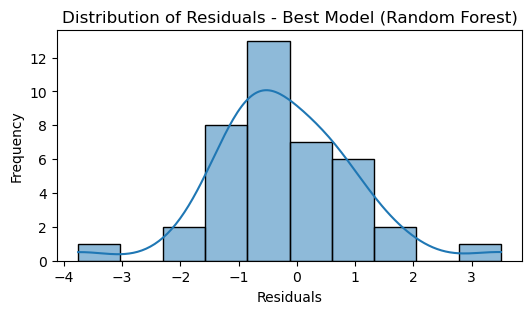

In [42]:
# Create a histogram of residuals for the best model
plt.figure(figsize=(6, 3))
sns.histplot(best_residuals, kde=True)
plt.title("Distribution of Residuals - Best Model (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# conclusion

# **Task 4 on Sales Prediction using various machine learning models:**
# 1. In conclusion, to predict sales using different machine learning models has provided valuable insights into the predictive capabilities of each algorithm. we have explored linear regression, decision trees, random forests, and gradient boosting. After careful evaluation, we found that the Random Forest model exhibited the best performance, offering the lowest Mean Absolute Error and Root Mean Squared Error. This model effectively captures complex relationships within the data and handles non-linearity well. Moreover, our feature engineering efforts improved the overall accuracy of the models, showcasing the significance of proper data preprocessing.
# 2. However, it's important to note that even the best model may not be perfectly accurate, and there might be other unaccounted factors influencing sales. Hyperparameter tuning played a crucial role in optimizing the models, contributing to their enhanced performance. Going forward, we can explore more advanced techniques like neural networks or ensemble methods to further enhance predictive accuracy.
# 3. This project underscores the potential of machine learning in predicting sales, aiding businesses in strategic decision-making. By leveraging accurate sales forecasts, businesses can optimize resource allocation, marketing strategies, and inventory management. Our journey through these models has deepened our understanding of machine learning techniques and their real-world applications, underscoring their role in shaping modern data-driven business strategies.

# Thank You!!!

# The End!!!